# Pandas

In [48]:
import pandas as pd

### What is Pandas? And why use it?

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to work with *relational* or *labeled* data. It stores data in a tabular form. Each table contains one or more data categories in columns, also called attributes. Each row, also called a record, contains a unique instance of the data represented by the table.

It is a fundamental high-level building block for doing practical, real world data analysis in Python. 

pandas is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure


Key features:
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, and HDF5
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

The most basic Pandas object is called a "Series". Pandas Series is a generalization of one-dimensional array with flexible indexing (one index per element in the column):

In [49]:
ages = [25, 30, 33, 28]
names = ['Konstantin', 'Nick', 'Hanna', 'Anna']
my_series = pd.Series(ages, index=names)
my_series

Konstantin    25
Nick          30
Hanna         33
Anna          28
dtype: int64

There is usually more than one way to achieve the same thing in Pandas

In [50]:
names_and_ages_dict = {'Konstantin': 25, 
                       'Nick':30, 
                       'Hanna':33, 
                       'Anna': 28}
my_series = pd.Series(names_and_ages_dict)
my_series

Konstantin    25
Nick          30
Hanna         33
Anna          28
dtype: int64

### Pandas DataFrame

Inevitably, we want to be able to store, view and manipulate data that is *multivariate*, where for every index there are multiple fields or columns of data, often of varying data type.

A `DataFrame` is a tabular data structure, encapsulating multiple series like columns in a spreadsheet. Pandas `DataFrame` is a generalization of two-dimensional array with flexible indexing. We can create DataFrames directly from a dictionary, or from series:

In [51]:
age = {'Konstantin': 25, 'Nick':30, 'Hanna':33, 'Anna': 28}
weight = {'Konstantin': 90, 'Nick': 80,'Hanna': 50, 'Anna':55}

In [52]:
df = pd.DataFrame({'age': age, 'weight': weight})

In [53]:
df

,age,weight
Konstantin,25,90
Nick,30,80
Hanna,33,50
Anna,28,55


How to access the individual parts of the DataFrame?

In [54]:
# records
df.index

Index(['Konstantin', 'Nick', 'Hanna', 'Anna'], dtype='object')

In [55]:
# attributes
df.columns

Index(['age', 'weight'], dtype='object')

How to manipulate records and attributes?

In [56]:
# change existing records
df.index = ['Nick', 'Konstantin', 'Hanna', 'Anna']

In [57]:
# delete existing records
df.drop('Nick')

,age,weight
Konstantin,30,80
Hanna,33,50
Anna,28,55


### Loading data

#### CSV file local

In [58]:
df = pd.read_csv("titanic_changed.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",femae,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### CSV file URL

In [59]:
csv_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
df = pd.read_csv(csv_url)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Data inspection
It is always a good idea to have a quick look at the first or last records of the DataFrame to find out about the general form of the data/the attributes.

In [60]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [61]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


Let's find out how many records and attributes our DataFrame holds

In [62]:
df.shape

(891, 15)

Also, which attributes are available?

In [63]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Digging a little bit deeper - what are the attribute statistics within our dataframe? Also reveals which attributes are in fact numeric values.

In [64]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Quick question: what are the 25%, 50%, and 75%?

#### Quick question: what is another name for the 50%?

### Data selection: column-wise

We can also select specific columns:

In [65]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [66]:
df[['survived', 'age', 'sex']].head()

,survived,age,sex
0,0,22.0,male
1,1,38.0,female
2,1,26.0,female
3,1,35.0,female
4,0,35.0,male


instead of the actual names we can also choose the columns by their position:

In [67]:
df[df.columns[:5]].head()

,survived,pclass,sex,age,sibsp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0


### Data Selection: Row-wise

Row-wise indexing can be done in two ways:
    - via the index value
    - via the numbered location of the row, row number 10 for example
    
`.iloc`: to index rows with numbered location <br>
`.loc`: to index rows with index value

For this purpose, let's change the index value of our DataFrame. So we are gonna import it differently:

In [68]:
age = {'Konstantin': 25, 'Nick':30, 'Hanna':33, 'Anna': 28}
weight = {'Konstantin': 90, 'Nick': 80,'Hanna': 50, 'Anna':55}

df = pd.DataFrame({'age': age, 'weight': weight})
df

,age,weight
Konstantin,25,90
Nick,30,80
Hanna,33,50
Anna,28,55


1. Option: Common matrix indexing

In [69]:
df.iloc[0,0]

25

2. Option: String indexing

In [70]:
df.loc['Nick','age']

30

To select all attributes of a record, simply leave out the attribute index:

In [71]:
df.iloc[2]

age       33
weight    50
Name: Hanna, dtype: int64

In [72]:
df.loc['Hanna']

age       33
weight    50
Name: Hanna, dtype: int64

### Masking
We can also use a filter to select records that comply with a condition. E.g. let's filter out DataFrame for people older than 28:

In [73]:
# construct our filter with regard to our condition
filter_age = df['age'] > 28
filter_age

Konstantin    False
Nick           True
Hanna          True
Anna          False
Name: age, dtype: bool

In [74]:
df[filter_age]

,age,weight
Nick,30,80
Hanna,33,50


In [75]:
# or
df.loc[df.age > 28]

,age,weight
Nick,30,80
Hanna,33,50


#### Element-wise boolean operations
We can also use more than one condition to filter our DataFrame

In [76]:
filter_age = (df.age > 28)

In [77]:
filter_weight = (df.weight > 60)

In [78]:
mask = filter_age & filter_weight
mask

Konstantin    False
Nick           True
Hanna         False
Anna          False
dtype: bool

In [79]:
df.loc[mask]

,age,weight
Nick,30,80


### How to select rows and columns at the same time?

In [80]:
df.loc[df.age > 28]['age']
# or
df.loc[df.age > 28, 'age']


Nick     30
Hanna    33
Name: age, dtype: int64

### These are only the very basics. There will be a more involved introduction to Pandas in Tutorial 6

---

### Find out more
- [Pandas essential basic functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html) (highly encouraged to take a look)
- [Scientific Visualization: Python + Matplotlib](https://github.com/rougier/scientific-visualization-book)

# Seaborn

### Introduction

Seaborn is a library that makes use of Matplotlib and Pandas to create very nice data visualizations with few lines of code. 


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

Seaborn is built on Matplotlib. That means that it returns objects from Matplotlib which you can change and interact with the same way as you learned in the previous Tutorial. 

Seaborn adds convenience functions that allow you to create good looking plots without having to optimize as much as you would have to with the raw Matplotlib. 

So, what do we need to use Seaborn with DataFrames?
* Input DataFrame
* Attributes plotted on the x-axis by attribute name
* Attributes plotted on the x-axis by attribute name


In [82]:
df = pd.read_csv(csv_url)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


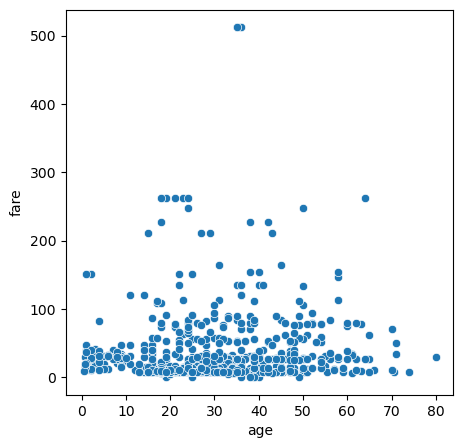

In [83]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
sns.scatterplot(data=df, x="age", y="fare", ax=ax);

The corresponding scatter plot from Matplotlib would look like this

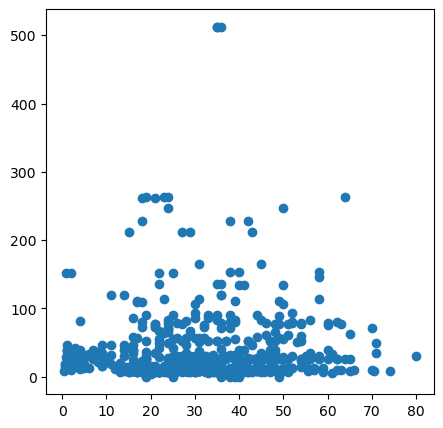

In [84]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
plt.scatter(df["age"], df["fare"]);

You can easily add a third column of your dataframe and display it in the color dimension using the argument `hue`

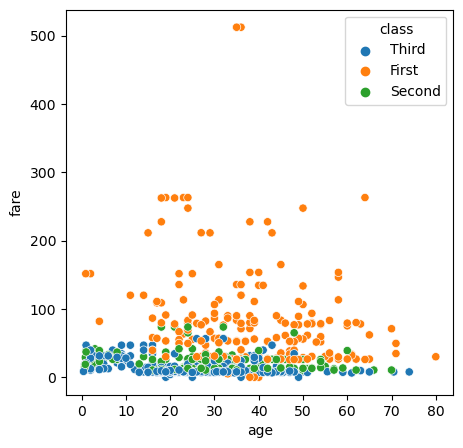

In [85]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
sns.scatterplot(data=df, x="age", y="fare", hue="class", ax=ax);

Since Seaborn uses Matplotlib in the background, you still have the full control over your plot though. Just use the axis object as you are used to

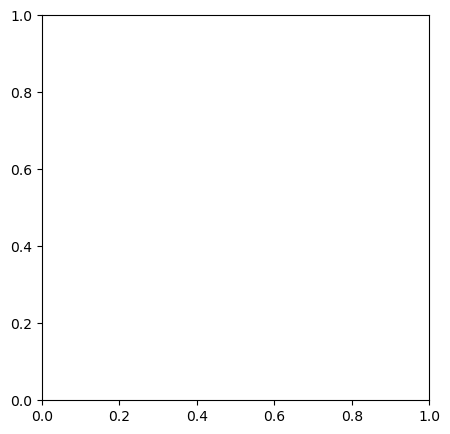

In [86]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)

Text(0.5, 1.0, 'Changed title')

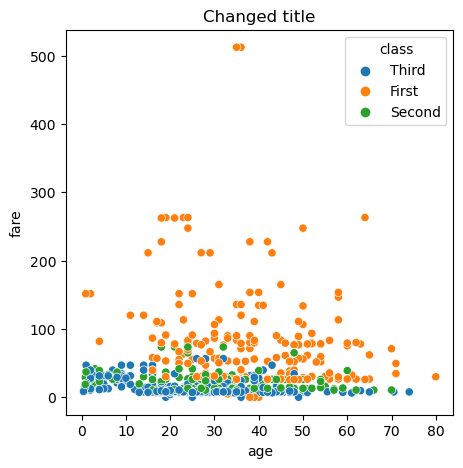

In [87]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
sns.scatterplot(data=df, x="age", y="fare", hue="class", ax=ax);
ax.set_title("Changed title")

Seaborn contains 3 different basic types of plots: Relational, distributions and categorical

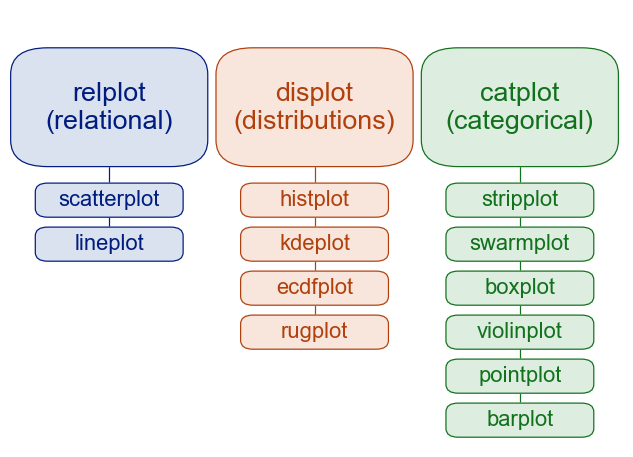

(0.0, 100.0)

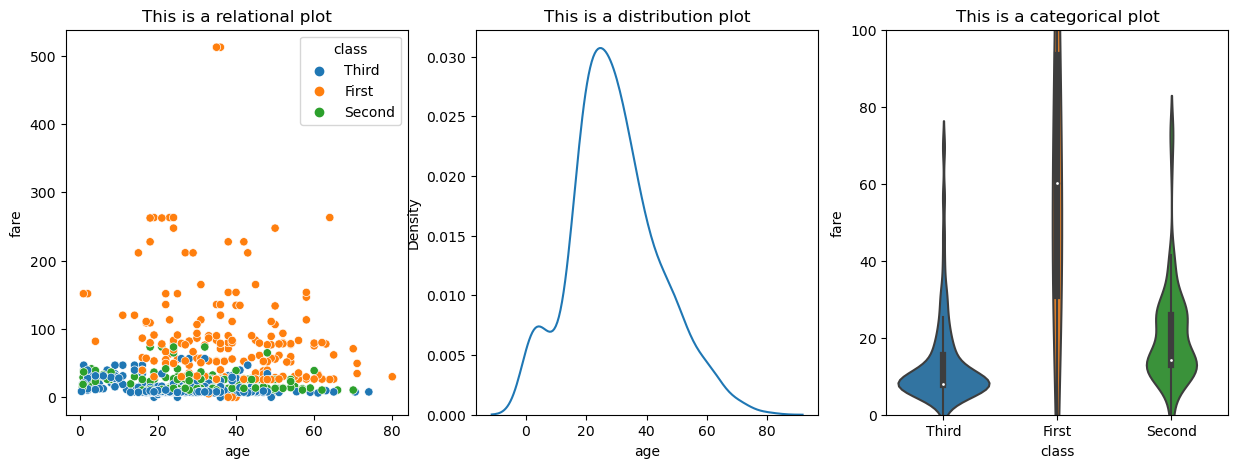

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), dpi=100)

sns.scatterplot(data=df, x="age", y="fare", hue="class", ax=axes[0]);
axes[0].set_title("This is a relational plot")

sns.kdeplot(data=df, x="age", ax=axes[1]);
axes[1].set_title("This is a distribution plot")

sns.violinplot(data=df, x="class", y="fare")
axes[2].set_title("This is a categorical plot")
axes[2].set_ylim(0, 100)

The seaborn plots that you have seen so far were built by axis-level functions. That means that they take in an argument called `ax` which is the axis of the underlying Matplotlib figure which it is plotted on. Seaborn also contains functions that create the whole figure for you, instead of only the axis:

In [89]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

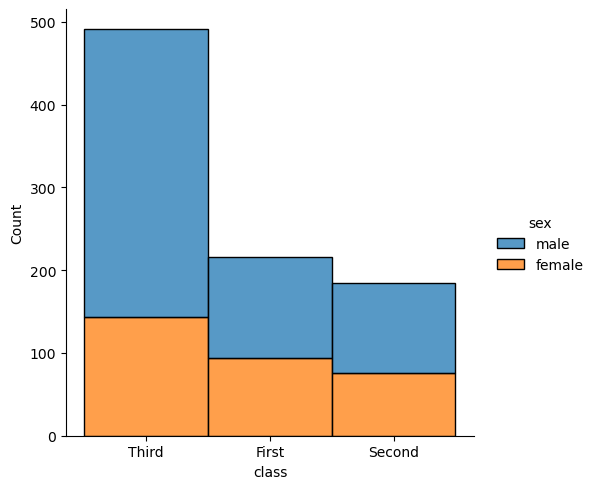

In [90]:
g = sns.displot(data=df, x="class", hue="sex", multiple="stack")

If you want to interact with the underlying Matplotlib axis, you can access it the following way:  

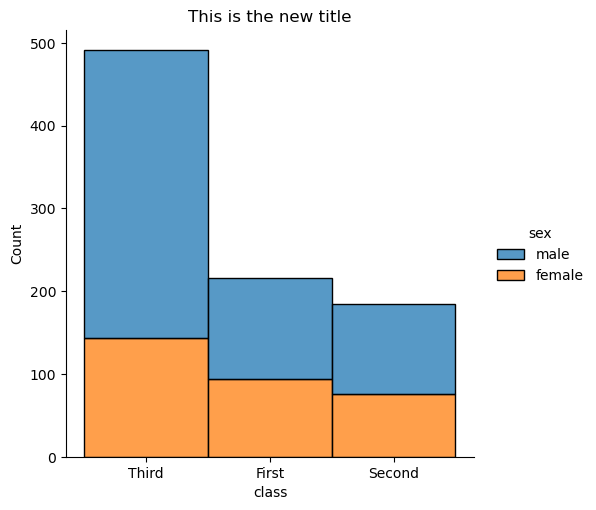

In [91]:
g = sns.displot(data=df, x="class", hue="sex", multiple="stack")
g.ax.set_title("This is the new title");

There are more figure-level plots that can be useful for exploring the data at hand:

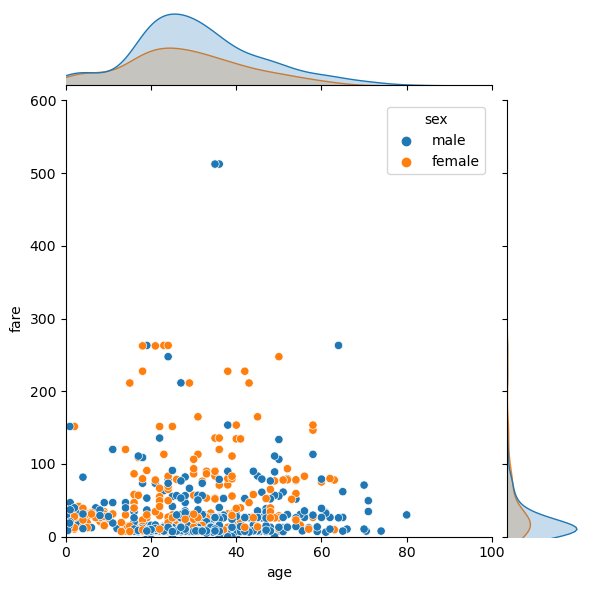

In [92]:
g = sns.jointplot(x = 'age', y = 'fare', hue = 'sex', data = df, xlim=(0,100), ylim=(0,600))

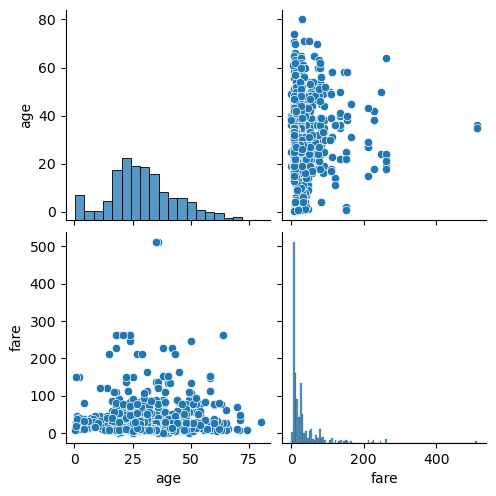

In [93]:
g = sns.pairplot(df[['age', 'fare']])